# Compare Speed between Carpet and CarpetX

In [3]:
using Plots, Printf, Measures
theme(:wong2)
using LaTeXStrings
include("../Utils/misc-stdout.jl")

Main.MiscStdout

## Grid

| Level | Radius | Points |
| ----- | ------ | ------ |
| 0 | 400.0 | 240 |
| 1 | 220.0 | 264 |
| 2 | 110.0 | 264 |
| 3 |  55.0 | 264 |
| 4 |  25.0 | 240 |
| 5 |  10.0 | 192 |
| 6 |   5.0 | 192 |
| 7 |   2.0 | 154 |
| 8 |   1.0 | 154 |

## Speed

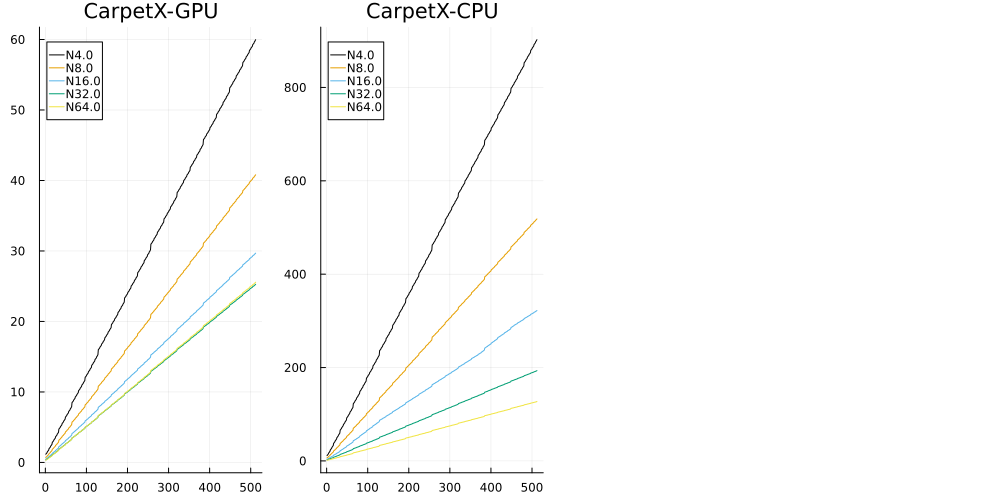

In [4]:
let patt_dirss = [
        ([
            (r"q1-Z4cowGPU-N\d+_r0000", "CarpetX-GPU"),
        ], "../../data/ScalingTest/CarpetX/vista/gcc-nvcc-tune", :cross),
        ([
            (r"q1-Z4cowGPU-interprocsonly-N\d+-MPI\d+_r0000", "CarpetX-CPU"),
        ], "../../data/ScalingTest/CarpetX/frontera/OMP2", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = MiscStdout.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1000,500))
    display(plt)
end

## Strong Scaling

#### Data of Carpet

In [5]:
# M/hour
#dat_carpet_OMP1 = [
#    [4,  4.3064681],
#    [8,  7.0979425],
#    [16, 10.5277862],
#    [32, 7.7146006],
#];
dat_carpet_OMP2_TpH = [
    [4,  4.0743337],
    [8,  7.3888573],
    [16, 11.1769291],
    [32, 13.8558473],
    [64, 11.7032279],
];
dat_carpet_OMP2_ZpS = [
    [4,  33057309.6665421],
    [8,  59949862.4478545],
    [16, 90684572.1823932],
    [32, 112420108.800275],
    [64, 94954723.1967954],
];

#### Data of CarpetX

M/day:
  CarpetX-GPU: [ 2.44e+03, 3.58e+03, 4.92e+03, 5.77e+03, 5.69e+03]
  CarpetX-CPU: [ 1.61e+02, 2.81e+02, 4.51e+02, 7.52e+02, 1.14e+03]


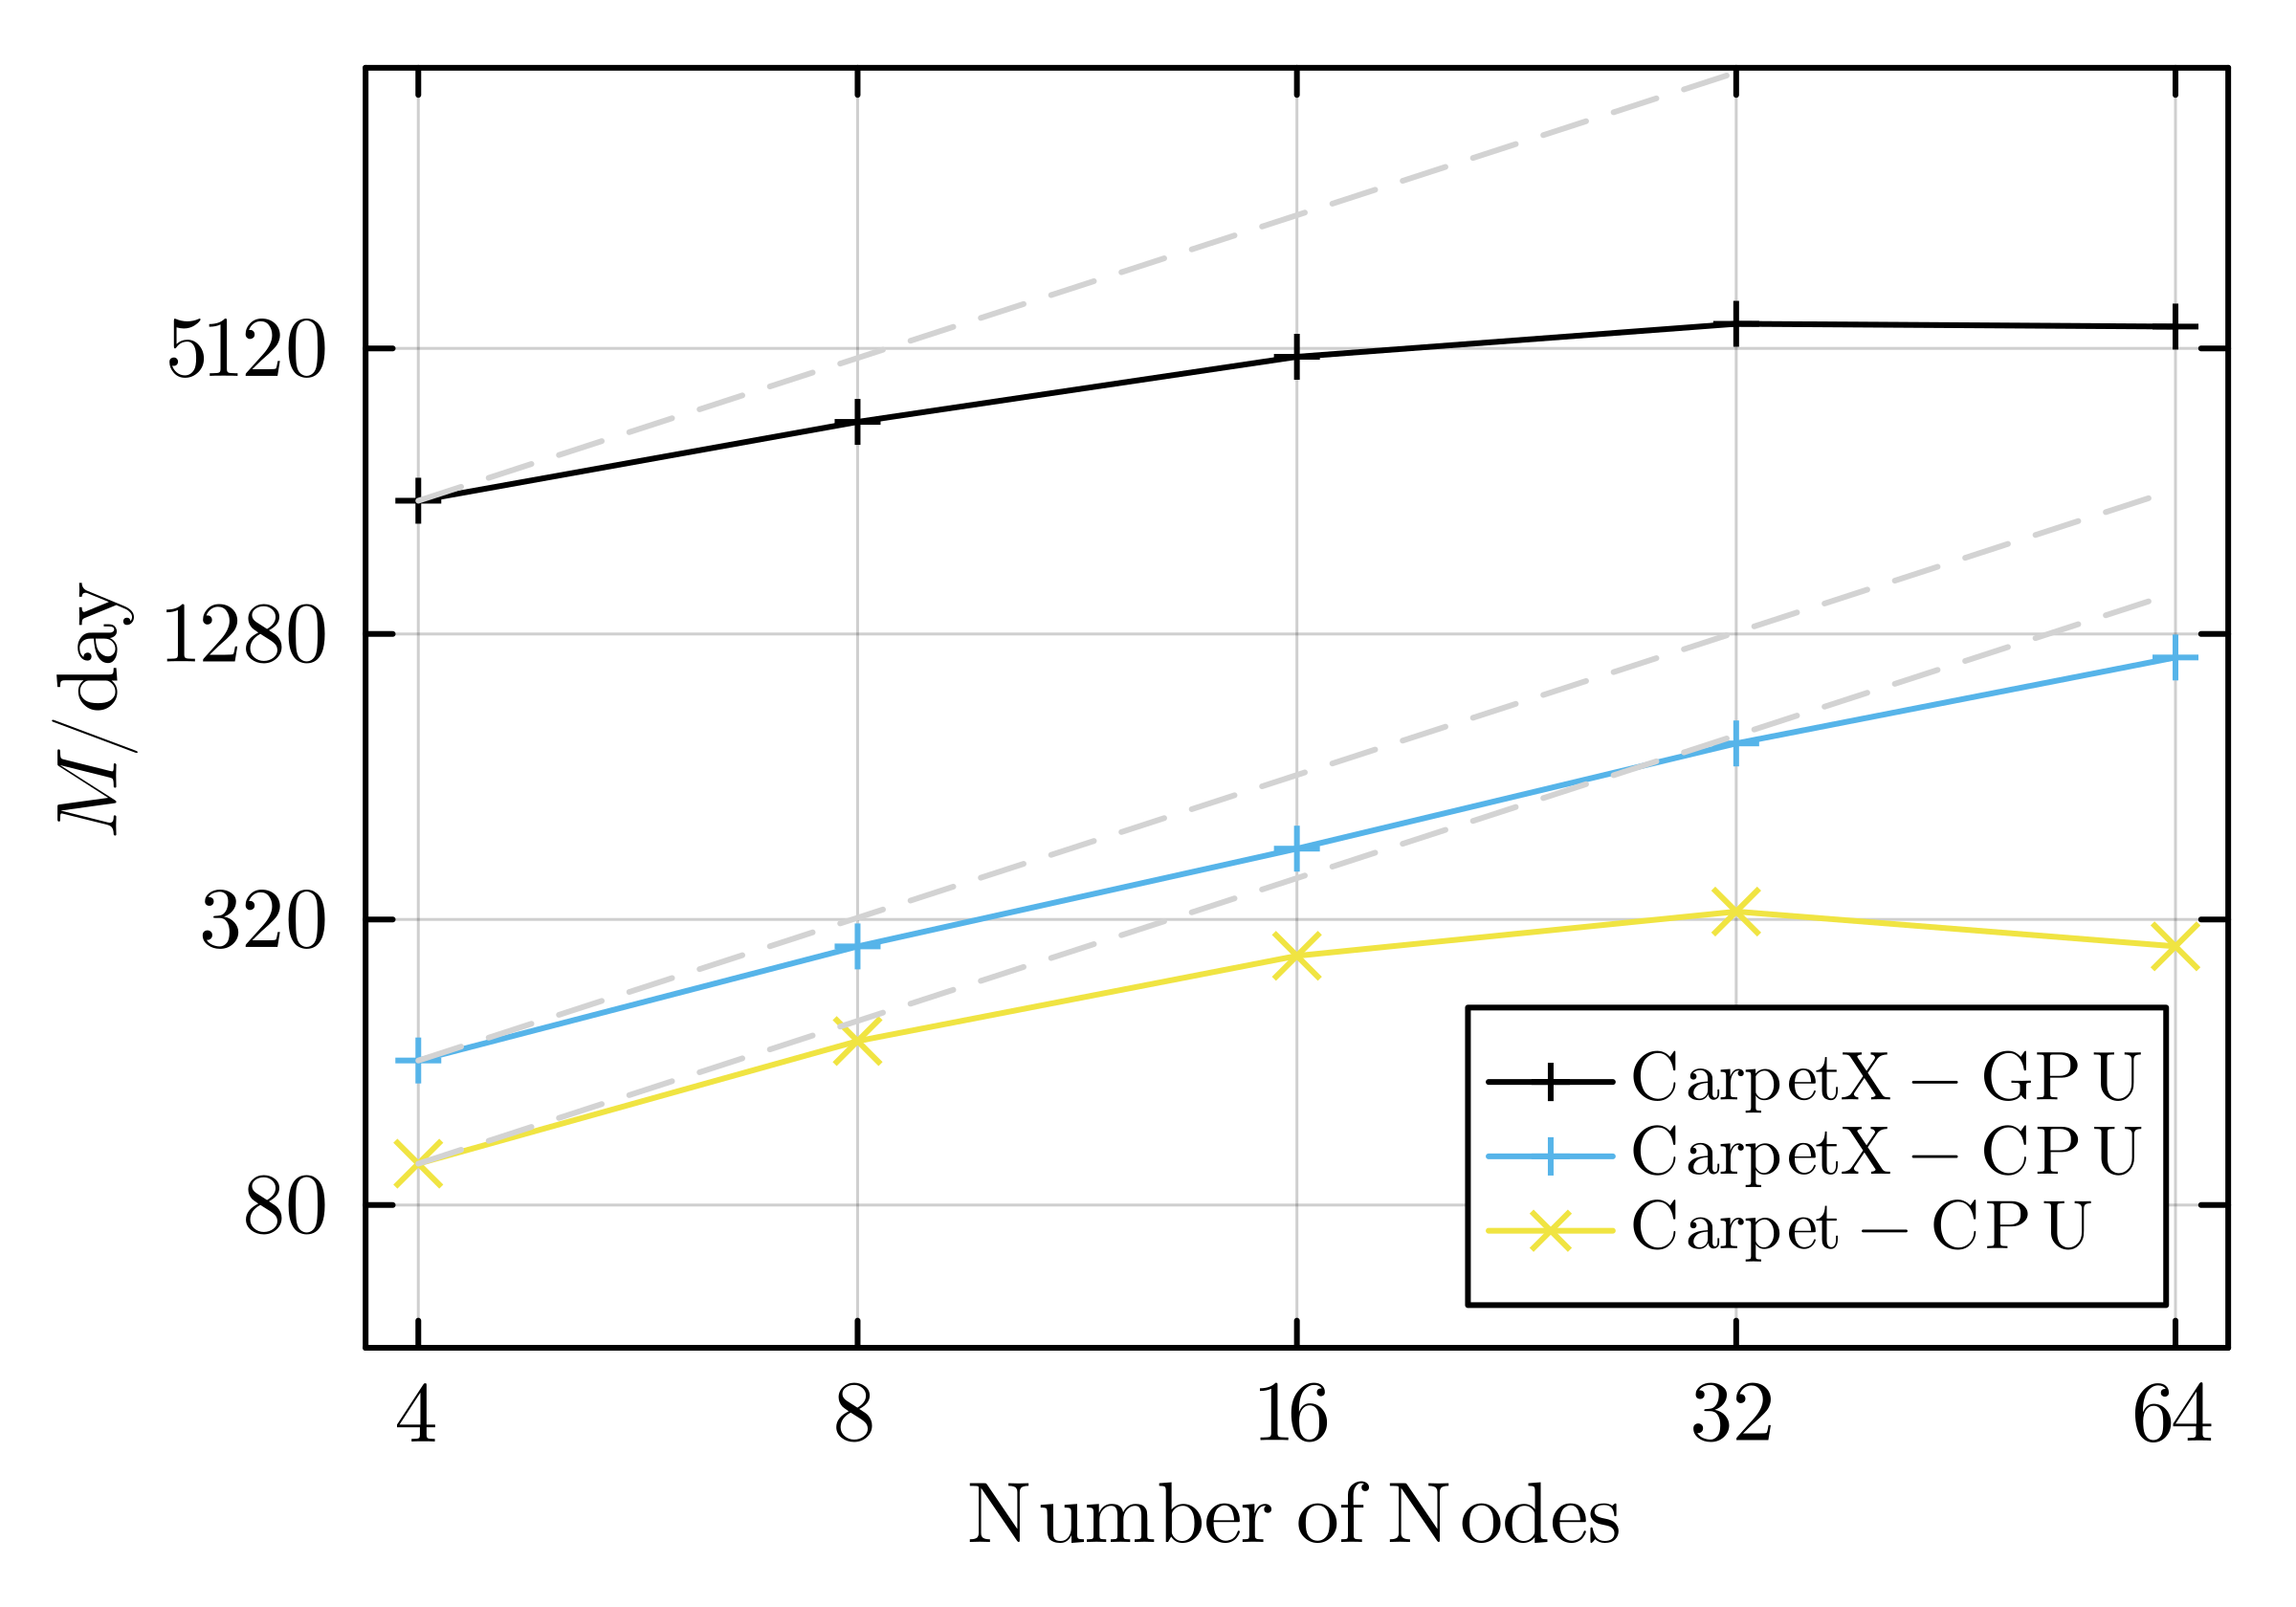

In [6]:
let patt_dirss = [
        ([
            (r"q1-Z4cowGPU-N\d+_r0000", "CarpetX-GPU"),
        ], "../../data/ScalingTest/CarpetX/vista/gcc-nvcc-tune", :cross),
        ([
            (r"q1-Z4cowGPU-interprocsonly-N\d+-MPI\d+_r0000", "CarpetX-CPU"),
        ], "../../data/ScalingTest/CarpetX/frontera/OMP2", :cross),
    ]
    
    # Plot M/day
    plt1 = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    plt1 = plot!(xlabel=L"\mathrm{Number\,\, of\,\, Nodes}", ylabel=L"M/\mathrm{day}", framestyle=:box,
                 xscale=:log10, yscale=:log10, ylim=(40, 20000), legend=:bottomright)
    xs = [4, 8, 16, 32, 64]
    xticks!(plt1, xs, [L"%$(n)" for n in xs])
    ys = [80, 320, 1280, 5120]
    yticks!(plt1, ys, [L"%$(n)" for n in ys])
    
    # Process datasets
    println("M/day:")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "TotalComputeTime")
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt1, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1], dat[2][1] .* dat[1]/4, label="", linestyle=:dash, color=:lightgray)
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")
        end
    end

    # Carpet
    plot!(plt1, [d[1] for d in dat_carpet_OMP2_TpH], [d[2] for d in dat_carpet_OMP2_TpH] * 24,
          marker=:xcross, label=L"\mathrm{Carpet-CPU}")
    plot!(plt1, [d[1] for d in dat_carpet_OMP2_TpH], (dat_carpet_OMP2_TpH[1][2] * 24) .* [d[1] for d in dat_carpet_OMP2_TpH]/4,
          linestyle=:dash, label="", color=:lightgray)

    plot!(plt1, size=(400,280), dpi=600)

    # Display
    # savefig(plt1, "CompareCarpetAndX.pdf")
    display(plt1)
end

## Weak Scaling

In [7]:
# zcs/sec
dat_carpet_OMP2_weak = [
    [4,  32343469.1810351],
    [8,  63382500.0871702],
    [16, 126995775.128042],
    [32, 234203952.501033],
    [64, 428189697.36823],
];

Zcs/s:
  CarpetX-GPU: [ 1.81e+09, 3.41e+09, 6.34e+09, 1.26e+10, 2.37e+10]
  CarpetX-CPU: [ 1.12e+08, 2.11e+08, 3.98e+08, 7.95e+08, 1.57e+09]


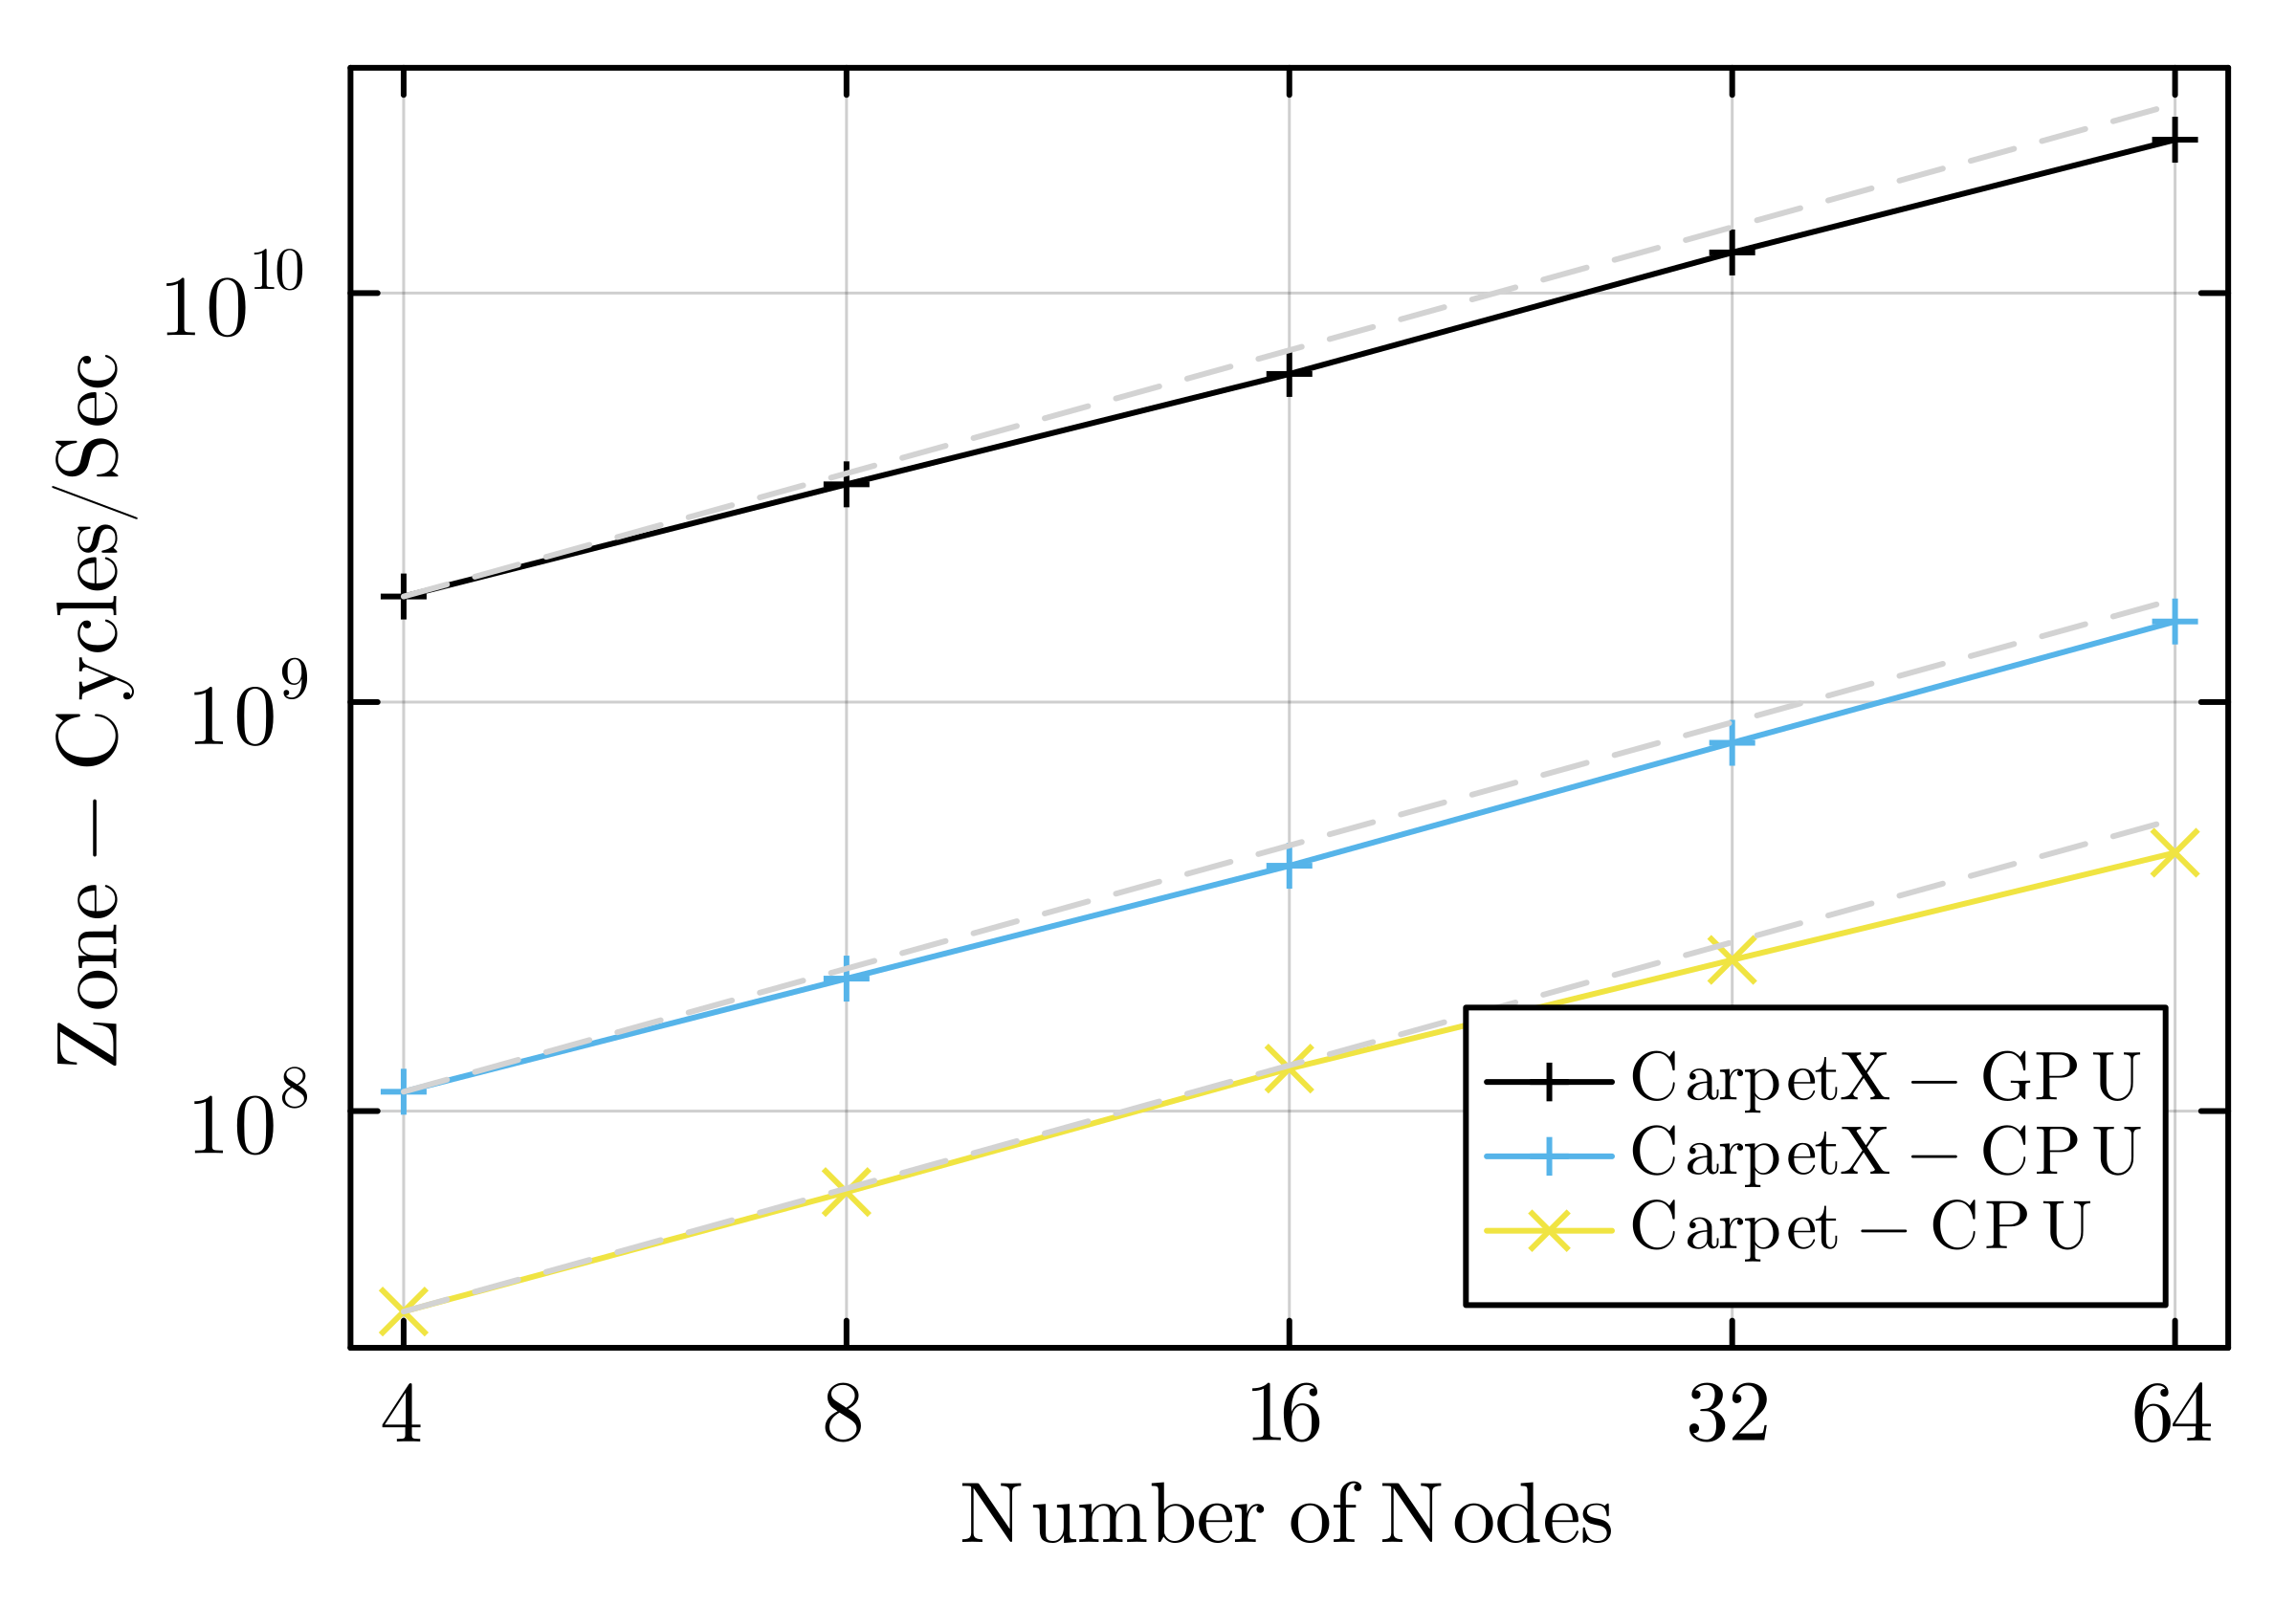

In [8]:
let patt_dirss = [
        ([
            (r"q1-Z4cowGPU-N\d+_r0000", "CarpetX-GPU"),
        ], "../../data/ScalingTest/CarpetX/vista/gcc-nvcc-tune-weak", :cross),
        ([
            (r"q1-Z4cowGPU-interprocsonly-N\d+-MPI\d+_r0000", "CarpetX-CPU"),
        ], "../../data/ScalingTest/CarpetX/frontera/OMP2-weak", :cross),
    ]
    
    # Plot M/day
    plt1 = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    plt1 = plot!(xlabel=L"\mathrm{Number\,\, of\,\, Nodes}", ylabel=L"\mathrm{Zone-Cycles}/\mathrm{Sec}", framestyle=:box,
                 xscale=:log10, yscale=:log10, legend=:bottomright)
    xs = [4, 8, 16, 32, 64]
    xticks!(plt1, xs, [L"%$(n)" for n in xs])
    yss = [
        [1e8,  L"10^8"],
        [1e9,  L"10^9"],
        [1e10, L"10^{10}"],
    ]
    yticks!(plt1, [y[1] for y in yss], [y[2] for y in yss])
    
    # Process datasets
    println("Zcs/s:")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond")
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt1, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1], dat[2][1] .* dat[1]/4, label="", linestyle=:dash, color=:lightgray)
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")
        end
    end

    # Carpet
    plot!(plt1, [d[1] for d in dat_carpet_OMP2_weak], [d[2] for d in dat_carpet_OMP2_weak],
          marker=:xcross, label=L"\mathrm{Carpet-CPU}")
    plot!(plt1, [d[1] for d in dat_carpet_OMP2_weak], (dat_carpet_OMP2_weak[1][2]) .* [d[1] for d in dat_carpet_OMP2_weak]/4,
          linestyle=:dash, label="", color=:lightgray)

    #plt1 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e-9, digits=1))"), topmargin=0.5cm)
    #plt1 = annotate!(4, 2.56e10*1.135, Plots.text(L"\times10^{9}", 10, :black, :left))
    
    plot!(plt1, size=(400,280), dpi=600)

    # Display
    # savefig(plt1, "CompareCarpetAndX_weak.pdf")
    display(plt1)
end